In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

Import and read the uber request data. Stored it in a variable called uber_request_data.

In [3]:
uber_request_data = pd.read_csv('Uber Request Data.csv')
uber_request_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
# Inspecting the structure of dataframe uber_request_data

uber_request_data.shape

(6745, 6)

In [5]:
# Looking at number of columns

list(uber_request_data)

['Request id',
 'Pickup point',
 'Driver id',
 'Status',
 'Request timestamp',
 'Drop timestamp']

In [6]:
# Looking at each column data type

uber_request_data.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [7]:
# Observing the structure of dataframe

uber_request_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


From the data we can find that for 6745 customer requests we have only 4095 cabs available. Hence we can say that there is a shortage of cabs. In detail we will investigate further

CLEANING THE DATA SET

In [8]:
# Check duplicate values
# As Request id should be unique we should not have any duplicate values in this column

uber_request_data[uber_request_data.duplicated(['Request id'], keep=False)]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


In [9]:
# Checking for missing values

uber_request_data.isna().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

Having null values in the columns "Driver id" and "Drop timestamp" is expected. Other than that we dont see any null values in any of the column in the data set

In [10]:
# Checking for any spelling mistakes in categorical columns

uber_request_data.groupby('Pickup point').size()

Pickup point
Airport    3238
City       3507
dtype: int64

In [153]:
uber_request_data.groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
dtype: int64

Hence there are no spelling mistakes or other unnecessary words in the columns

Thats it with the data cleaning, now will prepare the data for analysis

DATA PREPARATION

We can observe that the time stamp is different for different rows in Request timestamp and Drop timestamp. Will make the format to be same for all the rows across these two columns

In [11]:
uber_request_data['Request timestamp'] = uber_request_data['Request timestamp'].astype('datetime64[ns]')
uber_request_data['Drop timestamp'] = uber_request_data['Drop timestamp'].astype('datetime64[ns]')
uber_request_data


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00


In [12]:
# Checking if there are coerced because of invalid data values

pd.to_datetime(uber_request_data['Request timestamp'], errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
6715    False
6716    False
6717    False
6718    False
6719    False
6720    False
6721    False
6722    False
6723    False
6724    False
6725    False
6726    False
6727    False
6728    False
6729    False
6730    False
6731    False
6732    False
6733    False
6734    False
6735    False
6736    False
6737    False
6738    False
6739    False
6740    False
6741    False
6742    False
6743    False
6744    False
Name: Request timestamp, Length: 6745, dtype: bool

In [13]:
uber_request_data.applymap(lambda x: x == 'True').any().any()

False

In [14]:
# There are no invalid date values in 'Request timestamp'

In [15]:
# Splitting Date and Time to new columns from Timestamp

uber_request_data['Request_date'] = [d.date() for d in uber_request_data['Request timestamp']]
uber_request_data['Request_time'] = [d.time() for d in uber_request_data['Request timestamp']]

uber_request_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,2016-11-07,06:46:00


In [16]:
# Extracting hours
# Created a 'hr_func' function and used it for request_hour and drop_hour

def hr_func(ts):
    return ts.hour

uber_request_data['request_hour'] = uber_request_data['Request timestamp'].apply(hr_func)
uber_request_data['drop_hour'] = uber_request_data['Drop timestamp'].apply(hr_func)

uber_request_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_date,Request_time,request_hour,drop_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,13.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,18.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,9.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,9.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,22.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,7.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,6.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,18.0
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,2016-11-07,06:46:00,6,7.0


Creating a new column mentioning at which time of the day the request as been placed. 
Here the day is divided in to Morning Afternoon Evening and Night based on the request_hour

In [17]:
uber_request_data.columns = uber_request_data.columns.str.replace(' ', '_')
uber_request_data = uber_request_data.assign(
    timeOfDay=pd.cut(
        uber_request_data.Request_timestamp.dt.hour,
        [-1, 12, 16,20, 24],
        labels=['Morning', 'Afternoon', 'Evening','Night']))
uber_request_data

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_time,request_hour,drop_hour,timeOfDay
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,13.0,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,18.0,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,9.0,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,22.0,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,9.0,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,22.0,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,7.0,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,6.0,Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,18.0,Evening
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,2016-11-07,06:46:00,6,7.0,Morning


In [18]:
date = uber_request_data.Request_date.value_counts()
date

2016-07-15    1381
2016-11-07    1367
2016-07-14    1353
2016-07-13    1337
2016-12-07    1307
Name: Request_date, dtype: int64

This data set contains the data of five dates

Now the data is ready. Lets start with the ANALYSIS

DATA ANALYSIS

In [19]:
# Since Request_id and Driver_id are id's or unique values there isn't much sense analysing them

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
uber_request_data.Pickup_point.value_counts()


City       3507
Airport    3238
Name: Pickup_point, dtype: int64

In [22]:
# There is not much difference between the pickup points from airport and city
# Lets visualize above using plot in bar graph

# There are almost equivalent numbers of requests both from and to airport

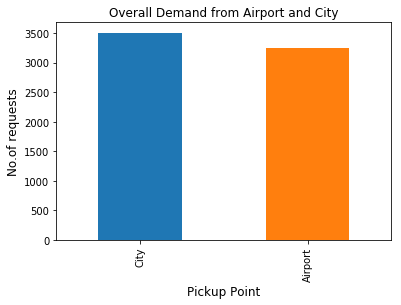

In [23]:
ax = uber_request_data['Pickup_point'].value_counts().plot(kind='bar', title ="Overall Demand from Airport and City")
ax.set_xlabel("Pickup Point", fontsize=12)
ax.set_ylabel("No.of requests", fontsize=12)
plt.show()

In [24]:
# Now lets summarize the count of requests having status 'Trip completed', 'Cancelled', and 'No cars available'
# Visualizing above by plotting it

uber_request_data.Status.value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

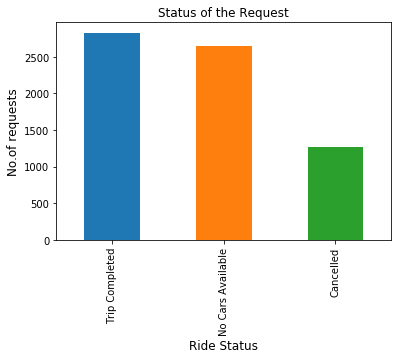

In [25]:
bx = uber_request_data['Status'].value_counts().plot(kind='bar', title ="Status of the Request")
bx.set_xlabel("Ride Status", fontsize=12)
bx.set_ylabel("No.of requests", fontsize=12)
plt.show()

Here the count of 'Trip Completed' is less than the sum of 'No cars available' and 'Cancelled'. This indicates that there is significant difference in the Demand and Supply

In [26]:
supply_demand = round(uber_request_data['Status'].value_counts(normalize=True) * 100)
supply_demand

Trip Completed       42.0
No Cars Available    39.0
Cancelled            19.0
Name: Status, dtype: float64

Hence from above the percentage of 'Trip Completed' is 42% and the sum of percentage of 'No Cars Available' and 'Cancelled' is 58%

So here the GAP is 58%, which is creating a huge revenue loss to UBER

In [27]:
# Lets look at the number of requests at the time of day wise

In [28]:
uber_request_data.timeOfDay.value_counts()

Morning      3279
Evening      1893
Night         947
Afternoon     626
Name: timeOfDay, dtype: int64

In [29]:
# Percentage of requests according to timeOfDay

round(uber_request_data['timeOfDay'].value_counts(normalize=True) * 100)

Morning      49.0
Evening      28.0
Night        14.0
Afternoon     9.0
Name: timeOfDay, dtype: float64

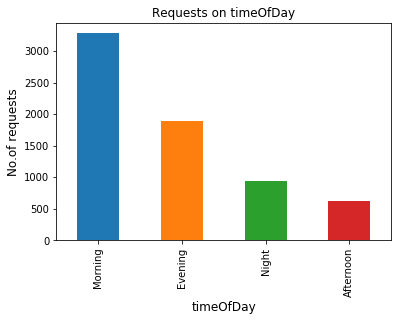

In [30]:
cx = uber_request_data['timeOfDay'].value_counts().plot(kind='bar', title ="Requests on timeOfDay")
cx.set_xlabel("timeOfDay", fontsize=12)
cx.set_ylabel("No.of requests", fontsize=12)
plt.show()

From above we can say that the half of the requests are in the Morning, followed by evening, night and afternoon

In [31]:
# Lets analyize the Status with respect to timeOfDay and Pickup_Point

In [32]:
uber_request_data.groupby(["Pickup_point", "timeOfDay", "Status"]).size()

Pickup_point  timeOfDay  Status           
Airport       Morning    Cancelled              49
                         No Cars Available     206
                         Trip Completed        650
              Afternoon  Cancelled              40
                         No Cars Available      50
                         Trip Completed        162
              Evening    Cancelled              78
                         No Cars Available    1067
                         Trip Completed        312
              Night      Cancelled              31
                         No Cars Available     390
                         Trip Completed        203
City          Morning    Cancelled             955
                         No Cars Available     649
                         Trip Completed        770
              Afternoon  Cancelled              32
                         No Cars Available     134
                         Trip Completed        208
              Evening    Cancelled     

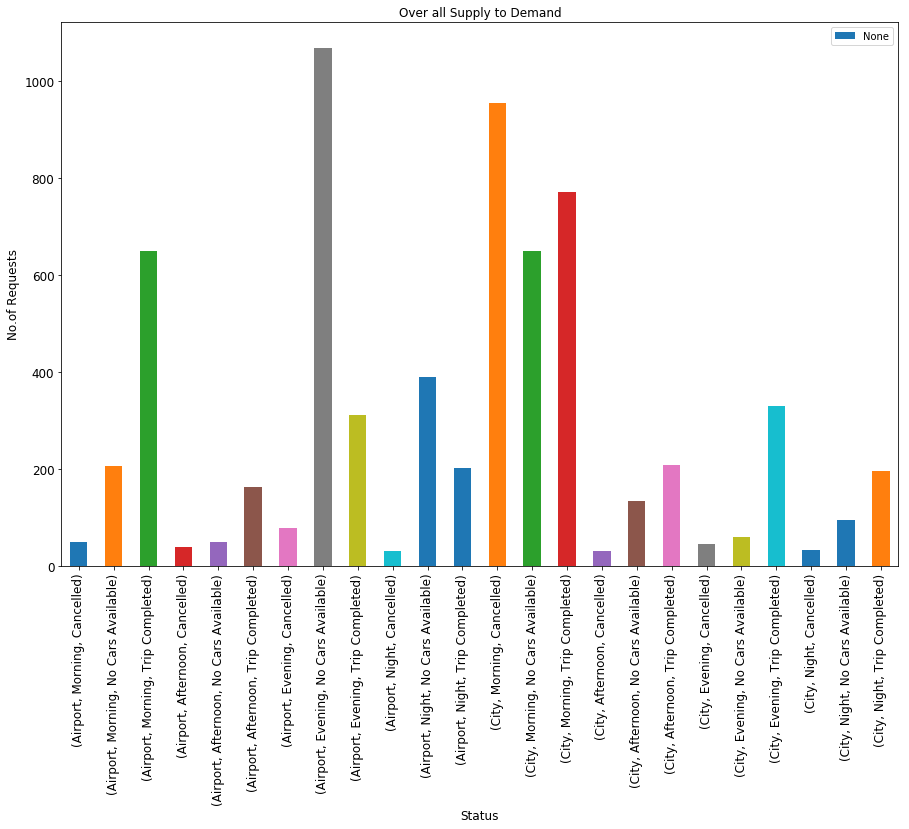

In [33]:
dx = uber_request_data.groupby(["Pickup_point", "timeOfDay", "Status"]).size().plot(kind='bar', title ="Over all Supply to Demand",figsize=(15, 10), legend=True, fontsize=12)
dx.set_xlabel("Status", fontsize=12)
dx.set_ylabel("No.of Requests", fontsize=12)
plt.show()

Text(0,0.5,'Count of Requests')

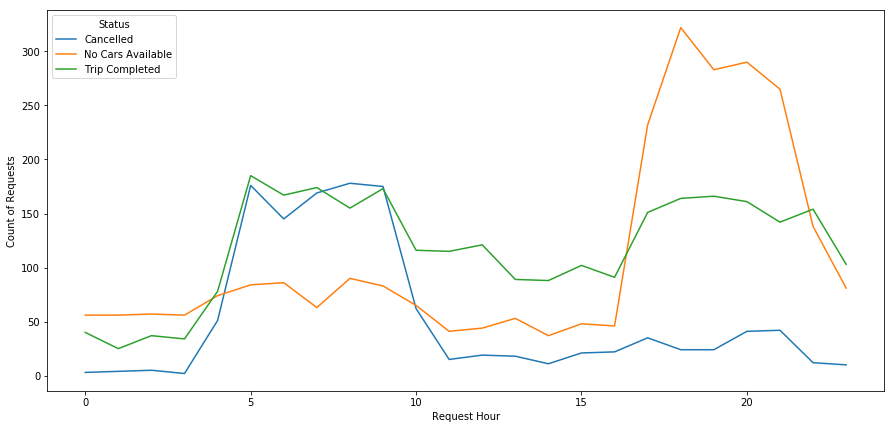

In [34]:
fig, ax = plt.subplots(figsize=(15,7))
uber_request_data.groupby(['request_hour','Status']).count()['Pickup_point'].unstack().plot(ax=ax)
ax.set_xlabel('Request Hour')
ax.set_ylabel('Count of Requests')

From above analysis it is found that
1. Customers requesting cabs from Airport get more 'No Cars Available' compared to customers from City
2. Customers from city to Airport get a lot of Cancellations from cab drivers
3. Drivers are avoiding trip to airport and also this results in non availability of drivers from airport
4. Based on Time we can see in the Morning Hours there is a huge demand for cabs to airport, however there are very less demand from Airport, hence drivers do not get enough return trips to City
5. Also in the late evenings there is a high demand at airport, but there are not enough cars around as there were very less trips from City to airport due to less flights in the early evening or afternoon
6. From the above plots it can be assumed that although there is not much difference  city requests and airport requests,city requests are problamatic requests because most of city requests gets cancelled by drivers.
7. Most Uber drivers are not ready to drive to airport because they may have to wait long before they get a trip back to city. This is the same reason for most airport requests cars are not available

DEMAND SUPPLY GAP

 - Every request for a cab will be DEMAND
 - Every request which is accepted and fulfilled will be SUPPLY
 - If request is not accepted or if there is non availability of cabs then it is a GAP

From above analysis we found that the GAP is 58%

In [35]:
# Lets create two columns stating Demand and whether the state is Suplly or Gap for Demand

In [36]:
uber_request_data

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_time,request_hour,drop_hour,timeOfDay
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,13.0,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,18.0,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,9.0,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,22.0,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,9.0,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,22.0,Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,7.0,Morning
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,6.0,Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,18.0,Evening
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,2016-11-07,06:46:00,6,7.0,Morning


In [37]:
uber_request_data['request_cab'] = 'Demand'
uber_request_data['supply_gap'] = np.where(uber_request_data['Status']=='Trip Completed', 'Supply', 'Gap')

uber_request_data

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Request_date,Request_time,request_hour,drop_hour,timeOfDay,request_cab,supply_gap
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,11,13.0,Morning,Demand,Supply
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,17,18.0,Evening,Demand,Supply
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,9,9.0,Morning,Demand,Supply
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,21,22.0,Night,Demand,Supply
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,9.0,Morning,Demand,Supply
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,21,22.0,Night,Demand,Supply
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,6,7.0,Morning,Demand,Supply
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,5,6.0,Morning,Demand,Supply
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,18.0,Evening,Demand,Supply
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,2016-11-07,06:46:00,6,7.0,Morning,Demand,Supply


In [38]:
# Lets analyize the supply_gap and count of it with respect to timeOfDay and Pickup_Point and status

In [39]:
uber_request_data.groupby(["Pickup_point", "timeOfDay", "Status","request_cab","supply_gap"]).size()

Pickup_point  timeOfDay  Status             request_cab  supply_gap
Airport       Morning    Cancelled          Demand       Gap             49
                         No Cars Available  Demand       Gap            206
                         Trip Completed     Demand       Supply         650
              Afternoon  Cancelled          Demand       Gap             40
                         No Cars Available  Demand       Gap             50
                         Trip Completed     Demand       Supply         162
              Evening    Cancelled          Demand       Gap             78
                         No Cars Available  Demand       Gap           1067
                         Trip Completed     Demand       Supply         312
              Night      Cancelled          Demand       Gap             31
                         No Cars Available  Demand       Gap            390
                         Trip Completed     Demand       Supply         203
City          Mornin

In [40]:
# Here we can observe what is the state for each Demand at all time slots

In [41]:
# Lets see the supply and gap for each hour in all the time slots

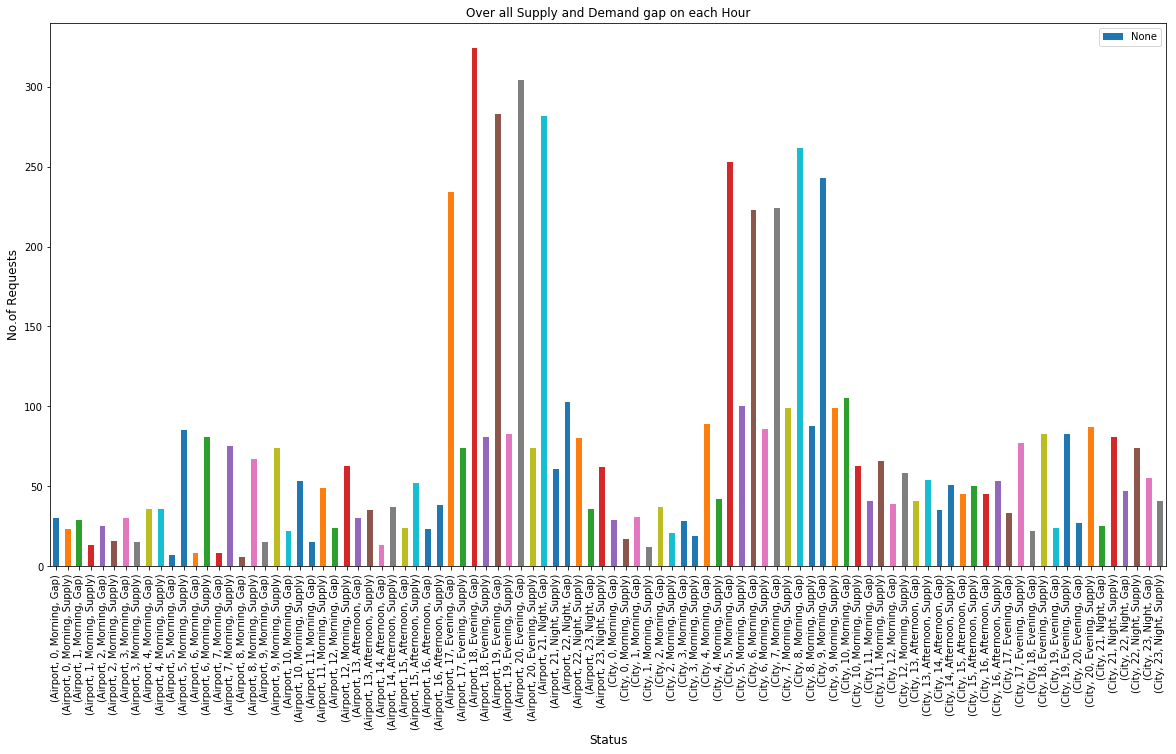

In [42]:
ex = uber_request_data.groupby(["Pickup_point","request_hour","timeOfDay","supply_gap"]).size().plot(kind='bar', title ="Over all Supply and Demand gap on each Hour",figsize=(20, 10), legend=True, fontsize=10)
ex.set_xlabel("Status", fontsize=12)
ex.set_ylabel("No.of Requests", fontsize=12)
plt.show()

From above analysis 
1. Gap for city pickup requests is high in the morning between hours 4 AM to 9 AM
2. Gap for Airport pickup requests is high at evening and night between hours 17 PM to 22 PM
3. For City pickup's the high GAP is in the morning slots and for Airport pickup's the high GAP is in the Evening and Night slots

As per the analysis made what i observed is, the reason for the supply demand gap is mainly due to drivers not being ready to take airport trips from city in mornings.
Because of this there is a huge gap of demand and supply in the morning slot for city pickup requests. As drivers are not ready 
to take airport trips from city there will be shortage of cabs at airport. Hence customers who wants to book uber will get no cars available as indication.
So there is a high gap for airport pickup requests in the evening and night slots.

My recommendations to fill the supply and demand gap:

1. Separate cabs should be allocated only for airport and city pickup's, hence there wont be any chance of cancelling the requests as those cabs runs between airport and city and vice versa
2. Prices between airport and city should be an attractive price and should provide good incentives for airport trips so that drivers get attracted to these trips and accepts requests without cancelling
3. Drivers should be updated with the flight schedules, when they know there is an arrival of flight then they show interest in airport trips from city
4. Uber can make cabs running in shift basis from city to airport and vice versa to reduce the supply and demand gap
5. By providing some waiting bonus and food allowance to airport trips to drivers will also help in reducing the supply demand gap, as drivers may get attracted with this point.

---------------------------------------------------------  END ---------------------------------------------------